# Data Science Transformers for Natural Language Processing - Beginner's Corner

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.4 MB/s eta 0:00:00


## Sentiment Analysis

### Downloading data

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-05-07 10:05:23--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  5.32MB/s    in 0.6s    

2023-05-07 10:05:24 (5.32 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



### Importing pipeline

In [ ]:
from transformers import pipeline

In [ ]:
classifier=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [ ]:
classifier("This is not such a great movie")

[{'label': 'NEGATIVE', 'score': 0.9989928603172302}]

In [ ]:
classifier("I can't say that this was a good movie")

[{'label': 'NEGATIVE', 'score': 0.9278441071510315}]

In [ ]:
# you can pass more than one sample into the pipeline and it
# will work

classifier(['This is such a good movie',
            'I dont like it'])

[{'label': 'POSITIVE', 'score': 0.9998687505722046},
 {'label': 'NEGATIVE', 'score': 0.9909656047821045}]

### Importing pipeline and using GPU

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.current_device()

0

In [ ]:
classifier= pipeline('sentiment-analysis',device=0)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


### Loading data

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/AirlineTweets.csv')

In [ ]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Preprocessing data

In [ ]:
df=df[['airline_sentiment','text']].copy()

In [ ]:
# since model can only predict positive or negative
df=df[df.airline_sentiment!= 'neutral'].copy()

<Axes: >

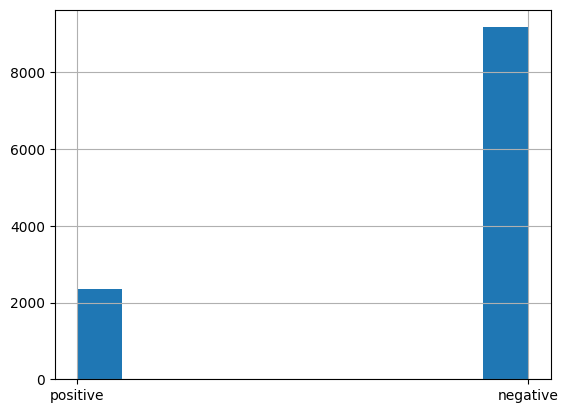

In [ ]:
df['airline_sentiment'].hist()

In [ ]:
target_map={"positive":1,'negative':0}
df['target']=df['airline_sentiment'].map(target_map)

In [ ]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [ ]:
len(df)

11541

### Getting predictions

In [ ]:
texts=df['text'].tolist()
predictions=classifier(texts)

In [ ]:
predictions[:10]

[{'label': 'POSITIVE', 'score': 0.6070823669433594},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553212523460388},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957}]

In [ ]:
# to calculate the AUC we are getting the positive prob for all
probs=[d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions]

In [ ]:
probs[:10]

[0.6070823669433594,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574944972991943,
 0.9553212523460388,
 0.9827088117599487,
 0.9994851350784302,
 0.9993509650230408,
 0.9940821528434753,
 0.9863133430480957]

In [ ]:
preds=[1 if d['label'].startswith('P') else 0 for d in predictions]

In [ ]:
import numpy as np
preds=np.array(preds)

### Evaluating

In [ ]:
print("acc: ",np.mean(df['target']==preds))

acc:  0.8898708950697514


The dataset is highly imbalanced here so the accuracy can be misleading

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score,classification_report
cm= confusion_matrix(df['target'],preds,normalize='true')
# normalize limits the results between 0 and 1
cm

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

In [ ]:
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['negative','positive'])

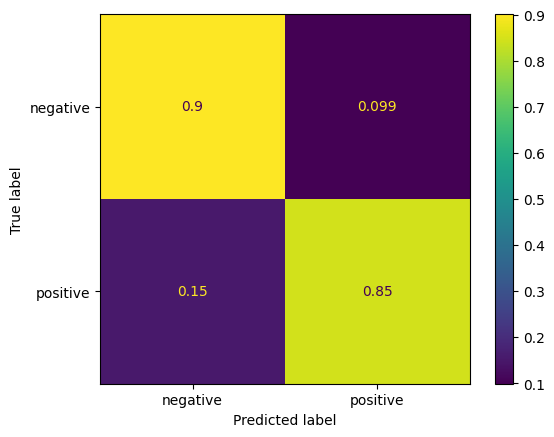

In [ ]:
cm_dis.plot()

In [ ]:
# f1_score depends on which label we assign to 0 and which to 1
f1_score(df['target'],preds)

0.7587777566900741

In [ ]:
# if we change 0 to 1 and 1 to zero
f1_score(1-df['target'],1-preds)

0.928647616908999

In [ ]:
print(classification_report(df['target'],preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      9178
           1       0.69      0.85      0.76      2363

    accuracy                           0.89     11541
   macro avg       0.82      0.87      0.84     11541
weighted avg       0.90      0.89      0.89     11541



In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(df['target'],probs)

0.9485933999009757

In [ ]:
roc_auc_score(1-df['target'],1-np.array(probs))

0.9485933999009756

AUC_ROC score stayed the same after inverting the labels hence showing it doesn't depends on the label assignment

## Text-Generation

 Text generation is just like time series modelling where we predict the future. The most common type of models are Autoregressive models. Regressive in a sense that we are looking into the past. The autoregressive models predict the next values in a time-series by looking at the previous values.

Thhis "structure" can be applied to any model like random forests, LSTM, transformers etc.

How is it related to language?
* Language is a "time series" (i.e. sequence) of categorical objects.
* In an autoregressive language model we find the distribution of the next word given the past words
* Language models go back 100 years to Markov model. In markov model we use the markov assumption that x(t+1) depends on x(t) only and so on.
* There is an obvious flaw in this assumption when we use it on language thats why these model cannot generate long coherent text.
* Example: "This is a great 'movie'", here the word movie is a good continuation but assume "Today in school, we learned about Alexander the great" but here since the model is only looking at the last word "great" it can generate 'movie' which is a good continuation for it but it doesn't make sense. If we account for more past, we will not make a mistake like this.
* RNN, CNN can account for more context with scalability. Markov models are not scalable because of the curse of dimensionality.
* For N-grams of vocab size V:
      ```V*V*V*V*V...N times= V^N estimates```
* Using Neural Networks, we can do it efficiently.
* Attention mechanism takes it one step further and solves it better.





### Downlading some data

In [ ]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt

--2023-05-07 11:49:16--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56286 (55K) [text/plain]
Saving to: ‘robert_frost.txt’

robert_frost.txt    100%[===================>]  54.97K  --.-KB/s    in 0.007s  

2023-05-07 11:49:16 (7.64 MB/s) - ‘robert_frost.txt’ saved [56286/56286]



### Loading the model

In [ ]:
gen=pipeline('text-generation')

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
prompt='Neural networks with attention have been used with great success.'
gen(prompt)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (50) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'Neural networks with attention have been used with great success. The primary goal of this article is to explore what types of neural networks have been used to measure attention and are particularly suitable for research of this kind, such as working memory, learning tasks,'}]

In [ ]:
gen(prompt,num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (50) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'Neural networks with attention have been used with great success. They can be designed that use magnetic stripes and magnetometers to visualize a human brain and give it special attention, or they can show it at a low-level. Their goal is to give'},
 {'generated_text': 'Neural networks with attention have been used with great success. Here we show that the neural network with attention is trained against an object using a non-neuronal approach that uses the idea of training instead of stimulus-dependent training (RDS)'},
 {'generated_text': 'Neural networks with attention have been used with great success. There\'s one big caveat, however: They\'re just very much one thing too many.\n\nThat\'s why this is our "Best Case" article. We\'re not just talking about'}]

In [ ]:
gen(prompt,max_length=30)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Neural networks with attention have been used with great success. Thus, we can expect to make significant improvement in the next few years.\n\nAn'}]

### Loading data

In [ ]:
lines=[line.rstrip() for line in open('/content/robert_frost.txt')]
lines=[line for line in lines if len(line)>0]

In [ ]:
lines[:10]

['Two roads diverged in a yellow wood,',
 'And sorry I could not travel both',
 'And be one traveler, long I stood',
 'And looked down one as far as I could',
 'To where it bent in the undergrowth;',
 'Then took the other, as just as fair,',
 'And having perhaps the better claim',
 'Because it was grassy and wanted wear,',
 'Though as for that the passing there',
 'Had worn them really about the same,']

### Generating text

In [ ]:
lines[0]

'Two roads diverged in a yellow wood,'

In [ ]:
gen(lines[0])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (50) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'Two roads diverged in a yellow wood, and over the bridge had fallen a large log, a large quantity of leaves and branches, and some stone fragments.\n\nThe man did not die of wounds or exhaustion, but had fallen about to him'}]

In [ ]:
lines[1]

'And sorry I could not travel both'

In [ ]:
gen(lines[0],max_length=20)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Two roads diverged in a yellow wood, which was being swept away by a large tide.\n'}]

In [ ]:
gen(lines[0],num_return_sequences=3,max_length=20)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Two roads diverged in a yellow wood, though nobody else was able to move the way that I'}, {'generated_text': 'Two roads diverged in a yellow wood, with a car travelling north and facing south.\n\n'}, {'generated_text': 'Two roads diverged in a yellow wood, and were blocked by fire. All fire stations and utilities'}]

In [ ]:
import textwrap
def wrap(x):
  return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=False)

### Generating every other line

In [ ]:
out=gen(lines[0],max_length=30)
print(wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Two roads diverged in a yellow wood, and the first of them had some
trees, and the two side by side stopped suddenly. I turned again


In [ ]:
prev="Two roads diverged in a yellow wood, and the first of \
them had some trees, and the two side by side stopped suddenly."

In [ ]:
out=gen(prev+'\n'+lines[2],max_length=60)
print(wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Two roads diverged in a yellow wood, and the first of them had some
trees, and the two side by side stopped suddenly.
And be one traveler,
long I stood, waiting a road from Sarn, in vain for the last three or
four, from which you might not reach before


In [ ]:
prev="Two roads diverged in a yellow wood, and the first of them had some\
trees, and the two side by side stopped suddenly.\
And be one traveler,\
long I stood, waiting a road from Sarn, in vain for the last three or\
four, from which you might not reach before"

In [ ]:
out=gen(prev+'\n'+lines[4],max_length=90)
print(wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Two roads diverged in a yellow wood, and the first of them had
sometrees, and the two side by side stopped suddenly.And be one
traveler,long I stood, waiting a road from Sarn, in vain for the last
three orfour, from which you might not reach before
To where it bent
in the undergrowth; and where it was to stand, and where thou
shouldarest see.And what was that, I thought


This is not a model, we would use to generate poetry since it's been trained on the text from the internet instead of poetry

In [ ]:
prompt='Neural networks with attention have been used with great success'+ \
" in natural language processing."

out=gen(prompt,max_length=300)
print(wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Neural networks with attention have been used with great success in
natural language processing. It's no coincidence that the research
team used this technique to show the importance of visual orientation
for working memory, and how it can make people recognize an unfamiliar
pattern.

Now this is not to say we're not equipped with the tools to
use these tools in practice or a future project, but with time and
practice, we're going to see these different groups of scientists
working on how humans learn to think about and remember things. We can
start with the right ones:

1 – The human eye (a part of the brain
involved in color perception) is built to recognize and remember words
and phrases. For example, one of the researchers on the study
mentioned before that we can also see that a person or a thing sees
our eyes and feels it.

2 – What's happening with these neural
networks? They're responding to the presence, perceived presence, and
perceived magnitude of stimuli (such as a flower)

## Masked/AutoEncoding language model

In autoregressive/casual model we input the previous timestamps to generate the next but in the Masked language model, we used the infromation from the past and the future to generate a token.
* Autoregressive modelling is used by GPT family. Example is GPT2 we used just before
* Masked language modelling is used by BERT
* It's application is Article spinning.

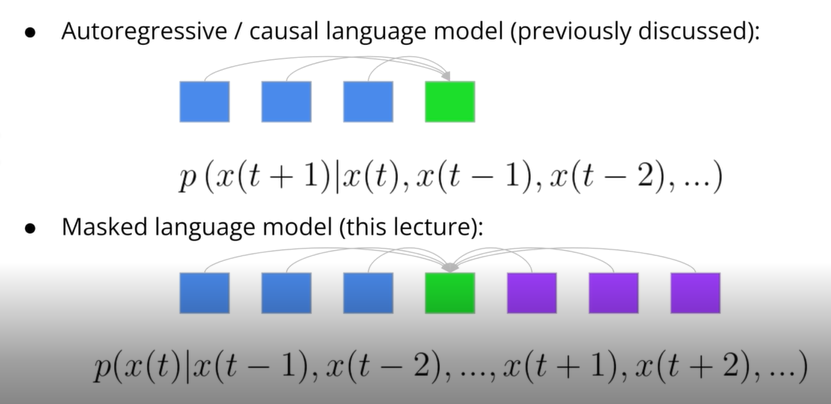

### Downloading the data

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-05-07 18:36:52--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.08s   

2023-05-07 18:36:54 (63.1 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



### Loading data

In [ ]:
import numpy as np
import pandas as pd
import textwrap

In [ ]:
df=pd.read_csv('bbc_text_cls.csv')

In [ ]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
labels=set(df['labels'])
labels

{'business', 'entertainment', 'politics', 'sport', 'tech'}

We are choosing business here because those articles might be easy to replicate, there's no need for the labels

In [ ]:
label='business'

In [ ]:
texts=df[df['labels']==label]['text']
texts.head()

0    Ad sales boost Time Warner profit\n\nQuarterly...
1    Dollar gains on Greenspan speech\n\nThe dollar...
2    Yukos unit buyer faces loan claim\n\nThe owner...
3    High fuel prices hit BA's profits\n\nBritish A...
4    Pernod takeover talk lifts Domecq\n\nShares in...
Name: text, dtype: object

In [ ]:
i=np.random.choice(texts.shape[0])
doc=texts.iloc[i]

In [ ]:
print(textwrap.fill(doc,replace_whitespace=False,fix_sentence_endings=True))

Consumers drive French economy

France's economic growth accelerated
in the last three months of 2004, driven by consumer spending, a
report shows.

Gross domestic product (GDP) rose by 0.8% in the fourth
quarter compared with the previous three month period, the statistical
office INSEE said.  That expansion pushed annual growth to 2.3%, the
fastest rate in two years.  Consumer spending was up by 1.2% in the
fourth quarter, and there also was a rebound in business investment
that gave the recovery an extra shove.

Analysts warned that France
still was facing challenges and was unlikely to keep expanding at its
current pace.

"France still has a strong economic growth," said Marc
Toutai, an economist at Natexis Banques Populaires.  "But, if we check
the figures in detail, there's a problem."  "Consumer spending is
still high.  But French households have spent their savings to
consume.  "France can't sustain a high growth rate without an
improvement in the job market.  There's too much 

### Loading the Model

In [ ]:
from transformers import pipeline

In [ ]:
mlm=pipeline('fill-mask')

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
mlm('Consumers drive French <mask>')

[{'score': 0.20347557961940765,
  'token': 1677,
  'token_str': ' cars',
  'sequence': 'Consumers drive French cars'},
 {'score': 0.03418535366654396,
  'token': 13921,
  'token_str': ' wines',
  'sequence': 'Consumers drive French wines'},
 {'score': 0.030041484162211418,
  'token': 22391,
  'token_str': ' fries',
  'sequence': 'Consumers drive French fries'},
 {'score': 0.02230474166572094,
  'token': 18196,
  'token_str': ' cuisine',
  'sequence': 'Consumers drive French cuisine'},
 {'score': 0.021551305428147316,
  'token': 866,
  'token_str': ' economy',
  'sequence': 'Consumers drive French economy'}]

### Testing

In [ ]:
text="France's economic growth accelerated \
in the last three months of 2004, driven by <mask> spending, a \
report shows."
mlm(text)

[{'score': 0.2391912043094635,
  'token': 2267,
  'token_str': ' consumer',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by consumer spending, a report shows."},
 {'score': 0.10055197030305862,
  'token': 1130,
  'token_str': ' increased',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by increased spending, a report shows."},
 {'score': 0.045843709260225296,
  'token': 723,
  'token_str': ' higher',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by higher spending, a report shows."},
 {'score': 0.040713392198085785,
  'token': 2112,
  'token_str': ' infrastructure',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by infrastructure spending, a report shows."},
 {'score': 0.028679588809609413,
  'token': 168,
  'token_str': ' government',
  'sequence': "France's economic growth accelerated in the last thr

In [ ]:
text="France's <mask> growth accelerated \
in the last three months of 2004, driven by consumer spending, a \
report shows."
mlm(text)

[{'score': 0.6428444385528564,
  'token': 776,
  'token_str': ' economic',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by consumer spending, a report shows."},
 {'score': 0.19086027145385742,
  'token': 6250,
  'token_str': ' GDP',
  'sequence': "France's GDP growth accelerated in the last three months of 2004, driven by consumer spending, a report shows."},
 {'score': 0.023419000208377838,
  'token': 8106,
  'token_str': ' productivity',
  'sequence': "France's productivity growth accelerated in the last three months of 2004, driven by consumer spending, a report shows."},
 {'score': 0.016868267208337784,
  'token': 5376,
  'token_str': ' export',
  'sequence': "France's export growth accelerated in the last three months of 2004, driven by consumer spending, a report shows."},
 {'score': 0.014111071825027466,
  'token': 866,
  'token_str': ' economy',
  'sequence': "France's economy growth accelerated in the last three months of 2004, d

In [ ]:
text="France's economic growth accelerated \
in the last three months of 2004, driven by consumer <mask>, a \
report shows."
mlm(text)

[{'score': 0.3453311622142792,
  'token': 1408,
  'token_str': ' spending',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by consumer spending, a report shows."},
 {'score': 0.2685832977294922,
  'token': 1077,
  'token_str': ' demand',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by consumer demand, a report shows."},
 {'score': 0.15510201454162598,
  'token': 2123,
  'token_str': ' confidence',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by consumer confidence, a report shows."},
 {'score': 0.06414490938186646,
  'token': 5702,
  'token_str': ' sentiment',
  'sequence': "France's economic growth accelerated in the last three months of 2004, driven by consumer sentiment, a report shows."},
 {'score': 0.0306966882199049,
  'token': 4850,
  'token_str': ' consumption',
  'sequence': "France's economic growth accelerated in the last three months 

In [ ]:
text='<mask> warned that France \
still was facing challenges and was unlikely to keep expanding at its \
current pace.'

mlm(text)

[{'score': 0.116731196641922,
  'token': 18843,
  'token_str': ' Hollande',
  'sequence': ' Hollande warned that France still was facing challenges and was unlikely to keep expanding at its current pace.'},
 {'score': 0.07193027436733246,
  'token': 894,
  'token_str': 'He',
  'sequence': 'He warned that France still was facing challenges and was unlikely to keep expanding at its current pace.'},
 {'score': 0.05103875324130058,
  'token': 5019,
  'token_str': 'sts',
  'sequence': 'sts warned that France still was facing challenges and was unlikely to keep expanding at its current pace.'},
 {'score': 0.03761739656329155,
  'token': 29005,
  'token_str': 'ozy',
  'sequence': 'ozy warned that France still was facing challenges and was unlikely to keep expanding at its current pace.'},
 {'score': 0.03331693634390831,
  'token': 6118,
  'token_str': ' Macron',
  'sequence': ' Macron warned that France still was facing challenges and was unlikely to keep expanding at its current pace.'}]

In [ ]:
text='Analysts warned that France \
still was facing challenges and was <mask> to keep expanding at its \
current pace.'

mlm(text)

[{'score': 0.27579131722450256,
  'token': 3306,
  'token_str': ' struggling',
  'sequence': 'Analysts warned that France still was facing challenges and was struggling to keep expanding at its current pace.'},
 {'score': 0.26818346977233887,
  'token': 3752,
  'token_str': ' unlikely',
  'sequence': 'Analysts warned that France still was facing challenges and was unlikely to keep expanding at its current pace.'},
 {'score': 0.26658210158348083,
  'token': 3276,
  'token_str': ' unable',
  'sequence': 'Analysts warned that France still was facing challenges and was unable to keep expanding at its current pace.'},
 {'score': 0.036553263664245605,
  'token': 533,
  'token_str': ' likely',
  'sequence': 'Analysts warned that France still was facing challenges and was likely to keep expanding at its current pace.'},
 {'score': 0.020494980737566948,
  'token': 3030,
  'token_str': ' determined',
  'sequence': 'Analysts warned that France still was facing challenges and was determined to kee

In [ ]:
i=np.random.choice(texts.shape[0])
doc=texts.iloc[i]

In [ ]:
print(textwrap.fill(doc,replace_whitespace=False,fix_sentence_endings=True))

European losses hit GM's profits

General Motors (GM) saw its net
profits fall 37% in the last quarter of 2004, as it continued to be
hit by losses at its European operations.

The US giant earned $630m
(£481.5m) in the October-to-December period, down from $1bn in the
fourth quarter of 2003. GM's revenues rose 4.7% to $51.2bn from
$48.8bn a year earlier.  The fourth-quarter losses at General Motors
Europe totalled $345m, up from $66m during the same period in 2003.
GM's main European brands are Opel and Vauxhall.

Excluding special
items, GM's global income from continuing operations totalled $569m
during the quarter, down from $838m a year earlier.  The results were
in line with Wall Street expectations and shares in GM rose by about
1% in pre-market trade.  For the whole of 2004, GM earned $3.7bn, down
from $3.8bn in 2003, while its annual revenue rose 4.5% to $193bn.  GM
said its profits were also hit by higher healthcare costs in the US.
"GM reported solid overall results in 2004,

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

mylist = [doc]
df = pd.DataFrame({"texts": mylist})
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
tfidf_separate = tfidf_vectorizer.fit_transform(df["texts"])
idf_scores={}
for x,y in zip(tfidf_separate.toarray().tolist()[0], tfidf_vectorizer.get_feature_names_out().tolist()):
  idf_scores[y]=x
idf_scores=sorted(idf_scores.items(),key=lambda x:x[1],reverse=True)
replace_words=[x[0] for x in idf_scores[13:50]]
for y in doc.split('.'):
  for x in y.split():
    if x in replace_words and x not in stopwords.words():
        y=y.replace(x,'<mask>',1)
        pred=mlm(y)[0]['token_str'].strip()
        doc=doc.replace(x,pred,1)
        y=y.replace('<mask>',x,1)


In [ ]:
print(textwrap.fill(doc,replace_whitespace=False,fix_sentence_endings=True))

European profit dent GM's profits

General Motors (GM) saw its net
profits fall 37% in the last quarter of 2004, as it continued to be
dent by losses at its European subsidiaries.

The US giant earns $630m
(£481.5m) in the October-to-December period, down from $1bn in the
fourth quarter of 2003. GM's revenues grew 4.7% to $51.Rated from
$48.Almost a year .". The fourth-quarter losses at General Motors
Europe totaled $345m, up from $66m during the same period in 2003.
GM's main European brands are Opel and Vauxhall.

Excluding special
items, GM's global income from continuing operations totaled $569m
during the quarter, down from $838m a year .. The shares were in line
with Wall Street expectations and shares in GM was by about 1% in pre-
market trade.  For the whole of 2004, GM spent $3.7bn, down from $3.%
in 2003, while its annual revenue rose 4.5% to $193bn.  GM said its
profits were also boosted by higher healthcare costs in the US. "GM
reported solid overall profits in 2004, despit

## Task Summarization

* To Summarize, you need to have a good understanding of the text
There are two type of summarization:

* Extractive: Summary is extracted from the document. it is a subset of the original document. Extractive summaries are easy to generate. You just need to find the relevent parts of the the input.
* Abstractive: These summaries can contain novel sequences of text not necessarily taken fron the input. These can be hard. Abstractive summaries require the understanding of the input as well as ability to generate coherent text.

* Summarization requires encoder-decoder architecture like other seq2seq models where input_length!=output_length

In [ ]:
from transformers import pipeline

In [ ]:
import pandas as pd
import numpy as np
import textwrap


### Downloading and loading dataset

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-05-10 21:24:17--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  5.79MB/s    in 0.8s    

2023-05-10 21:24:19 (5.79 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
df=pd.read_csv('bbc_text_cls.csv')

In [ ]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


### Extracting article for summarization

In [ ]:
doc=df[df.labels=='business']['text'].sample(random_state=42)

In [ ]:
def wrap(x):
  return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)

In [ ]:
print(wrap(doc.iloc[0]))

Christmas sales worst since 1981

UK retail sales fell in December,
failing to meet expectations and making it by some counts the worst
Christmas since 1981.

Retail sales dropped by 1% on the month in
December, after a 0.6% rise in November, the Office for National
Statistics (ONS) said.  The ONS revised the annual 2004 rate of growth
down from the 5.9% estimated in November to 3.2%. A number of
retailers have already reported poor figures for December.  Clothing
retailers and non-specialist stores were the worst hit with only
internet retailers showing any significant growth, according to the
ONS.

The last time retailers endured a tougher Christmas was 23 years
previously, when sales plunged 1.7%.

The ONS echoed an earlier
caution from Bank of England governor Mervyn King not to read too much
into the poor December figures.  Some analysts put a positive gloss on
the figures, pointing out that the non-seasonally-adjusted figures
showed a performance comparable with 2003. The Novembe

### Creating summaries

In [ ]:
summarizer=pipeline('summarization',device=0)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Here we are removing the title from the article because that would be kind of cheating since the titles are usually the summary of the articles

In [ ]:
summarizer(doc.iloc[0].split('\n',1)[1])

[{'summary_text': ' Retail sales dropped by 1% on the month in December, after a 0.6% rise in November . Clothing retailers and non-specialist stores were the worst hit with only internet retailers showing any significant growth . The last time retailers endured a tougher Christmas was 23 years ago, when sales plunged 1.7% .'}]

In [ ]:
def print_summary(doc):
  result=summarizer(doc.iloc[0].split('\n',1)[1])
  print(wrap(result[0]['summary_text']))

This summary seems like Extractive instead of Abstractive but the model did a good job here.

In [ ]:
print_summary(doc)

 Retail sales dropped by 1% on the month in December, after a 0.6%
rise in November . Clothing retailers and non-specialist stores were
the worst hit with only internet retailers showing any significant
growth . The last time retailers endured a tougher Christmas was 23
years ago, when sales plunged 1.7% .


In [ ]:
doc=df[df.labels=='entertainment']['text'].sample(random_state=123)
print(wrap(doc.iloc[0]))

Goodrem wins top female MTV prize

Pop singer Delta Goodrem has
scooped one of the top individual prizes at the first Australian MTV
Music Awards.

The 21-year-old singer won the award for best female
artist, with Australian Idol runner-up Shannon Noll taking the title
of best male at the ceremony.  Goodrem, known in both Britain and
Australia for her role as Nina Tucker in TV soap Neighbours, also
performed a duet with boyfriend Brian McFadden.  Other winners
included Green Day, voted best group, and the Black Eyed Peas.
Goodrem, Green Day and the Black Eyed Peas took home two awards each.
As well as best female, Goodrem also took home the Pepsi Viewers
Choice Award, whilst Green Day bagged the prize for best rock video
for American Idiot.  The Black Eyed Peas won awards for best R 'n' B
video and sexiest video, both for Hey Mama.  Local singer and
songwriter Missy Higgins took the title of breakthrough artist of the
year, with Australian Idol winner Guy Sebastian taking the honours f

Here, the summary seems more abstractive but you can see the mistak i.e. "green day" mentioned twice. More abstractive models are prone to more mistakes

In [ ]:
print_summary(doc)

 The 21-year-old singer won the award for best female artist .
Australian Idol runner-up Shannon Noll took the title of best male at
the ceremony . Other winners included Green Day, the Black Eyed Peas,
Missy Higgins and Green Day . The VH1 First Music Award went to Cher
honouring her achievements within the music industry .


## NER: Named Entity Recognition

* Data is highly imbalanced in most cases

**Example:**

Steve Jobs really liked to wear black turtlenecks

B-PER I-PER  O      O    O  O     O       O


In [ ]:
from transformers import pipeline

### Downloading data

Our model was fine tuned on the same dataset we are using here so it wont be surprising if it works well

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/ner_train.pkl
!wget -nc https://lazyprogrammer.me/course_files/nlp/ner_test.pkl

--2023-05-10 21:45:46--  https://lazyprogrammer.me/course_files/nlp/ner_train.pkl
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4757208 (4.5M) [application/octet-stream]
Saving to: ‘ner_train.pkl’

ner_train.pkl       100%[===================>]   4.54M  5.54MB/s    in 0.8s    

2023-05-10 21:45:47 (5.54 MB/s) - ‘ner_train.pkl’ saved [4757208/4757208]

--2023-05-10 21:45:47--  https://lazyprogrammer.me/course_files/nlp/ner_test.pkl
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1201978 (1.1M) [application/octet-stream]
Saving to: ‘ner_test.pkl’

ner_test.pkl        100%[===========

### Loading data

In [ ]:
import pickle

with open('ner_train.pkl','rb') as f:
  corpus_train=pickle.load(f)

with open('ner_test.pkl','rb') as f:
  corpus_test=pickle.load(f)

### Loading NER classifier

"simple" : Will attempt to group entities following the default schema. (A, B-TAG), (B, I-TAG), (C,
                  I-TAG), (D, B-TAG2) (E, B-TAG2) will end up being [{"word": ABC, "entity": "TAG"}, {"word": "D",
                  "entity": "TAG2"}, {"word": "E", "entity": "TAG2"}] Notice that two consecutive B tags will end up as
                  different entities. On word based languages, we might end up splitting words undesirably : Imagine
                  Microsoft being tagged as [{"word": "Micro", "entity": "ENTERPRISE"}, {"word": "soft", "entity":
                  "NAME"}]. Look for FIRST, MAX, AVERAGE for ways to mitigate that and disambiguate words (on languages
                  that support that meaning, which is basically tokens separated by a space). These mitigations will
                  only work on real words, "New york" might still be tagged with two different entities.

In [ ]:
ner=pipeline('ner',aggregation_strategy='simple',device=0)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


### Preprocessing the data

In [ ]:
corpus_test[:1]

[[('CRICKET', 'O'),
  ('-', 'O'),
  ('LEICESTERSHIRE', 'B-ORG'),
  ('TAKE', 'O'),
  ('OVER', 'O'),
  ('AT', 'O'),
  ('TOP', 'O'),
  ('AFTER', 'O'),
  ('INNINGS', 'O'),
  ('VICTORY', 'O'),
  ('.', 'O')]]

In [ ]:
inputs=[]
targets=[]

for sentence_tag_pairs in corpus_test:
  tokens=[]
  target=[]
  for token,tag in sentence_tag_pairs:
    tokens.append(token)
    target.append(tag)
  inputs.append(tokens)
  targets.append(target)

In [ ]:
inputs[9]

['He',
 'was',
 'well',
 'backed',
 'by',
 'England',
 'hopeful',
 'Mark',
 'Butcher',
 'who',
 'made',
 '70',
 'as',
 'Surrey',
 'closed',
 'on',
 '429',
 'for',
 'seven',
 ',',
 'a',
 'lead',
 'of',
 '234',
 '.']

### Creating a detokenizer and testing on inputs

These transformers take sentences as inputs so we will need to join the words back into the sentences but as you know  join function from python could work for simple text but it wont work here. Example: There should be space before a period rather than after it, consider this word "pass-words", this will be joined as "pass - words".

The detokenizer knows the rules and can join the sentences back together better


In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
detokenizer= TreebankWordDetokenizer()

In [ ]:
detokenizer.detokenize(inputs[9])

'He was well backed by England hopeful Mark Butcher who made 70 as Surrey closed on 429 for seven, a lead of 234.'

In [ ]:
targets[9]

['O',
 'O',
 'O',
 'O',
 'O',
 'B-LOC',
 'O',
 'B-PER',
 'I-PER',
 'O',
 'O',
 'O',
 'O',
 'B-ORG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [ ]:
ner(detokenizer.detokenize(inputs[9]))

[{'entity_group': 'LOC',
  'score': 0.99967515,
  'word': 'England',
  'start': 22,
  'end': 29},
 {'entity_group': 'PER',
  'score': 0.99974275,
  'word': 'Mark Butcher',
  'start': 38,
  'end': 50},
 {'entity_group': 'ORG',
  'score': 0.9996264,
  'word': 'Surrey',
  'start': 66,
  'end': 72}]

### Function to convert huggingface format to target

In [ ]:
# this function converts the tags returned from hugging face model to a format
# same as the targets list so they can be compared later
def compute_predictions(tokens,input_,ner_result):
  # map hugging face ner result to list of tags for later
  # performance assessment
  predicted_tags=[]
  state='O' # keep track of state, so if O--->B, if B--->I, if I--->I
  current_index=0
  for token in tokens:
    index=input_.find(token)
    assert(index>=0)
    current_index+=index

    # check if this index belonds to an entity and assign labels
    tag='O'
    for entity in ner_result:
      if current_index>=entity['start'] and current_index<entity['end']:
        if state=='O':
          state='B'
        else:
          state='I'
        tag=f"{state}-{entity['entity_group']}"
        break
    if tag=='O':
      state='O'
    predicted_tags.append(tag)
    input_=input_[index+len(token):]
    current_index+=len(token)
  assert(len(predicted_tags)==len(tokens))
  return predicted_tags


### Testing the function

In [ ]:
input_=detokenizer.detokenize(inputs[9])
ner_result=ner(input_)
ptags=compute_predictions(inputs[9],input_,ner_result)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
accuracy_score(targets[9],ptags)

1.0

In [ ]:
for targ,pred in zip(targets[9],ptags):
  print(targ,pred)

O O
O O
O O
O O
O O
B-LOC B-LOC
O O
B-PER B-PER
I-PER I-PER
O O
O O
O O
O O
B-ORG B-ORG
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O


### Computing the accuracy and f1 score on test data

In [ ]:
detok_inputs=[]
for tokens in inputs:
  text=detokenizer.detokenize(tokens)
  detok_inputs.append(text)

In [ ]:
ner_results=ner(detok_inputs)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1080: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [ ]:
predictions=[]
for tokens, text, ner_result in zip(inputs,detok_inputs,ner_results):
  pred=compute_predictions(tokens,text,ner_result)
  predictions.append(pred)


In [ ]:
def flatten(list_of_lists):
  flattened=[val for sublist in list_of_lists for val in sublist]
  return flattened

In [ ]:
flat_predictions=flatten(predictions)
flat_targets=flatten(targets)

In [ ]:
accuracy_score(flat_targets,flat_predictions)

0.9916563354782848

In [ ]:
f1_score(flat_targets,flat_predictions,average='macro')

0.95403328229255

## Neural Machine Translation

* Machine translation is also an example of sequence to sequence task seq2seq

* Evaluation of translation model is difficult because many valid translation can exist for a input sentence. E.g. "hi" vs "hello"
* Hi and hello are both right but in this case you will define what is right and what is not
* Most popular metric for this is BELU(Bilingual Evaluation Understudy) score. The best correlated with human judgement.
* More about BLEU
  1. Prediction is comapred with multiple reference texts
  2. output is value between 0 and 1
  3. Looks at precision of N-grams(n=1,2,3,4)


### Downloading data

In [ ]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2023-05-11 14:14:54--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  2.22MB/s    in 1.1s    

2023-05-11 14:14:56 (2.22 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [ ]:
!unzip -nq spa-eng.zip

In [ ]:
!ls

sample_data  spa-eng  spa-eng.zip


In [ ]:
!ls spa-eng

_about.txt  spa.txt


In [ ]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


### Compiling eng-spa translations

In [ ]:
eng2spa={}
for line in open('spa-eng/spa.txt'):
  line=line.rstrip()
  eng,spa=line.split('\t')
  if eng not in eng2spa:
    eng2spa[eng]=[]
  eng2spa[eng].append(spa)

In [ ]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

### Loading tokenizers and BLEU score

In [ ]:
from nltk.translate.bleu_score import sentence_bleu,SmoothingFunction

In [ ]:
# since bleu score works with tokens rather than raw text
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')

In [ ]:
tokenizer.tokenize("¿Qué me cuentas?".lower())

['qué', 'me', 'cuentas']

In [ ]:
tokens=tokenizer.tokenize("¿Qué me cuentas?".lower())
# first arguemnt is the accepted translations and the second argument is
# model outputs
sentence_bleu([tokens],tokens)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [ ]:
sentence_bleu([['hi']],['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

This is genreating warnings because there is no smoothing function and the n-grams are lower

In [ ]:
smoother=SmoothingFunction()
sentence_bleu(['hi'],'hi',smoothing_function=smoother.method4)

0.2213885886251307

In [ ]:
# we dont get any error and actual score because the tokens are 4.
#the last output doesn't make much sense since both are the same token
# but it might be because of less number of tokens
sentence_bleu([[1,2,3,4]],[1,2,3,4])

1.0

### Pretokenizing targets for later use

In [ ]:
eng2spa_tokens={}
for eng, spa_list in eng2spa.items():
  spa_list_tokens=[]
  for text in spa_list:
    token=tokenizer.tokenize(text.lower())
    spa_list_tokens.append(token)
  eng2spa_tokens[eng]=spa_list_tokens

### Loading the model

In [ ]:
!pip install transformers sentencepiece transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline

In [ ]:
translator=pipeline("translation",model='Helsinki-NLP/opus-mt-en-es',device=0) #model parameter is required here to specify the input and out language

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translator("I like eggs and ham")

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [ ]:
eng_phrases=list(eng2spa.keys())
len(eng_phrases)

102904

### Translating data

The number of phrases are too much for our compute capabilities so we are only using 1000 samples and we are starting at index 20000 since the phrases are ordered by the length and shoter sentences will generate warnings on bleu score

In [ ]:
eng_phrases[55000]

'The boss gave us all a day off.'

In [ ]:
eng_phrases_subset=eng_phrases[55000:56000]

In [ ]:
translations=translator(eng_phrases_subset)

In [ ]:
translations[:10]

[{'translation_text': 'El jefe nos dio a todos un día libre.'},
 {'translation_text': 'La caja estaba hecha de sándalo.'},
 {'translation_text': 'El chico que amo no me ama.'},
 {'translation_text': 'El chico se perdió en el bosque.'},
 {'translation_text': 'El chico derribó el vaso.'},
 {'translation_text': 'El chico parecía un adulto.'},
 {'translation_text': 'El chico se hizo el tonto.'},
 {'translation_text': 'El chico hizo felices a sus padres.'},
 {'translation_text': 'El chico dijo que vendría un lobo.'},
 {'translation_text': 'El chico se parece a su padre.'}]

In [ ]:
scores=[]
for eng,pred in zip(eng_phrases_subset,translations):
  matches=eng2spa_tokens[eng]

  # tokenize translation
  spa_pred=tokenizer.tokenize(pred['translation_text'].lower())
  score=sentence_bleu(matches,spa_pred)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

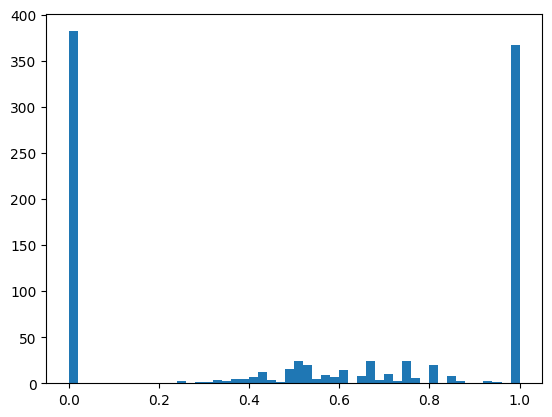

In [ ]:
import matplotlib.pyplot as plt
plt.hist(scores,bins=50);

In [ ]:
import numpy as np
np.mean(scores)

0.5191386780341513

In [ ]:
np.random.seed(1)

def print_random_translation():
  i=np.random.choice(len(eng_phrases_subset))
  eng=eng_phrases_subset[i]
  print("EN:",eng)

  translation=translations[i]['translation_text']
  print("ES Translation: ",translation)
  matches=eng2spa[eng]
  print("Matches: ", matches)

In [ ]:
print_random_translation()

EN: The divers didn't make it back.
ES Translation:  Los buzos no regresaron.
Matches:  ['Los buzos no lograron volver.']


In [ ]:
print_random_translation()

EN: These boots are from Australia.
ES Translation:  Estas botas son de Australia.
Matches:  ['Estas botas son de Australia.']


In [ ]:
print_random_translation()

EN: We don't think Tom killed Mary.
ES Translation:  No creemos que Tom matara a Mary.
Matches:  ['No creemos que Tom haya matado a María.']


## Question answering

* Benchmark Question answering dataset is SQuAD (Stanford Question Ansering Dataset)
* The answer is contained in the input such as you provide model with einstein wikipedia page and ask Questions like "When was Einstein born?"
* In some cases, there might not be an answer such as if we provide model with einstein wikipedia page and ask question such as " what goes into the peanut butter sandwich?"
* The model is comprehending the input not building up knowledge
* This model can be thought of as seq2seq but it is much simpler since the answer is provided in the context(input).
* The model's output can be just start and end indicies of the context.
Example: "Albert einstein was born on March 14, 1879." Q:"When was albert einstein born" Out: [28,42]
* What you can do to provide model question and answer in one input is through special tokens like
```[CLS] Where did i go? [SEP] I went to the store [SEP]```

 ### Loading the model

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 108.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

In [ ]:
qa=pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
ctx='Today, I made a peanut butter sandwich.'
q='What did I do today?'
qa(context=ctx,question=q)

{'score': 0.7968316674232483,
 'start': 9,
 'end': 38,
 'answer': 'made a peanut butter sandwich'}

In [ ]:
ctx='Albert Einstein (14 March 1879 - 18 April 1955) was a German-born \
theoretical physicist,[5] widely acknowledged to be one of the greatest \
and most influential physicists of all time. Best known for developing the \
theory of relativity, he also made important contributions to the \
development of the theory of quantum mechanics. Relativity and quantum \
mechanics are the two pillars of modern physics. His mass-energy \
equivalence formula E = mc2, which arises from relativity theory, has \
been dubbed "the world\'s most famous equation". His work is also \
known for its influence on the philosophy of science.He \
received the 1921 Nobel Prize in Physics "for his services to \
theoretical physics, and especially for his discovery of the \
law of the photoelectric effect", a pivotal step in the development \
of quantum theory. His intellectual achievements and originality resulted \
in "Einstein" becoming synonymous with "genius".[11] Einsteinium, one of \
the synthetic elements in the periodic table, was named in his honor.'

In [ ]:
question='When was Albert Einstein born?'
qa(context=ctx,question=question)

{'score': 0.9506133794784546,
 'start': 17,
 'end': 30,
 'answer': '14 March 1879'}

Note that we dont explicitly provide the date of birth of einstein. It is just within parenthesis with the death date and the model can identify which is the date of birth and which is date of death

In [ ]:
question='What was Albert Einstein\'s occupation?'
qa(context=ctx,question=question)

{'score': 0.9185676574707031,
 'start': 66,
 'end': 87,
 'answer': 'theoretical physicist'}

In [ ]:
question='What was Albert Einstein known for?'
qa(context=ctx,question=question)

{'score': 0.9050495028495789,
 'start': 198,
 'end': 233,
 'answer': 'developing the theory of relativity'}

In [ ]:
question='What else has albert Einstein contributed to?'
qa(context=ctx,question=question)

{'score': 0.24840179085731506,
 'start': 298,
 'end': 325,
 'answer': 'theory of quantum mechanics'}

In [ ]:
question='What are the two pillars of modern physics?'
qa(context=ctx,question=question)

{'score': 0.9951260089874268,
 'start': 327,
 'end': 359,
 'answer': 'Relativity and quantum mechanics'}

In [ ]:
question='Where was Albert Einstein born?'
qa(context=ctx,question=question)

{'score': 0.9950499534606934, 'start': 54, 'end': 60, 'answer': 'German'}

Model comes up with German and not germany, why? because the input string doesn't contain that sentence at all but the closest is german so it returns that

In [ ]:
question='What is peanut butter made of?'
qa(context=ctx,question=question)

{'score': 0.18038305640220642,
 'start': 924,
 'end': 935,
 'answer': 'Einsteinium'}

Since the model doesn;t have that context so it comes up with a answer it thinks is the closest but in actuality is wrong. We can see that the score is low so we know the answer can be wrong.

## Zero-Shot Classification

* With regular classification, we train a model using labeled dataset, e.g. train a classifier to predict whether a person is wearing a mask or not.
* The model can only predict that if a person is wearing a mask or not but nothing else.
* Now, imagine you build a powerful model that can recognize anything, Zero-shot classifcation allows us to adjust the labels to predict anything we want and not just some hardcoded classes.
* Like we can provide it with context and ask "What is the occupation of Einstein" [Scientist, Painter] but then we provide it with a wikipedia page on mitochondria and ask "Which subject is this" [biology, math, psychology].
* Zero shot classification provides us with this ability to morph the classes however we want.

* How can we build this model? A typical softmax model won't work this way because there we train the model to some defined classes.
* We don't have different brain for different tasks. We have one brain that can choose multiple choice based on the context and the options, even though the options change.

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap as tw
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

###Load Model

In [ ]:
from transformers import pipeline

In [ ]:
clf=pipeline('zero-shot-classification',device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
clf("This is a great Movie",candidate_labels=['positive','negative'])

{'sequence': 'This is a great Movie',
 'labels': ['positive', 'negative'],
 'scores': [0.9972434043884277, 0.002756547648459673]}

In [ ]:
clf("This is a bad Movie",candidate_labels=['positive','negative'])

{'sequence': 'This is a bad Movie',
 'labels': ['negative', 'positive'],
 'scores': [0.9987788796424866, 0.0012210929999127984]}

We can see that output labels we ordered so "positive" doesn't remain the first label here. The output is ordered by the scores, classes with higher scores come first

### Loading the Dataset

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-05-12 19:40:38--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.03s   

2023-05-12 19:40:39 (156 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
df=pd.read_csv("bbc_text_cls.csv")

In [ ]:
len(df)

2225

In [ ]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
df.labels.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: labels, dtype: int64

In [ ]:
df.sample(frac=1).head()

,text,labels
426,Chinese exports rise 25% in 2004\n\nExports fr...,business
1774,Navratilova hits out at critics\n\nMartina Nav...,sport
1249,Brown names 16 March for Budget\n\nChancellor ...,politics
1694,Barbarians 19-47 New Zealand\n\nNew Zealand pr...,sport
2126,US peer-to-peer pirates convicted\n\nThe first...,tech


### Preprocessing data

In [ ]:
labels=list(set(df['labels']))
labels

['business', 'entertainment', 'tech', 'sport', 'politics']

In [ ]:
print(tw.fill(df.iloc[1024]['text']))

UK troops on Ivory Coast standby  Downing Street has confirmed British
troops are on standby in case they need to help evacuate several
hundred UK citizens from Ivory Coast.  The news came as it emerged
France had begun evacuating its hostages after days of anti-French
demonstrations. Trouble flared after nine French peacekeepers were
killed and President Jacques Chirac ordered the destruction of the
Ivory Coast's air force. A company of 100-120 UK troops is understood
to have been put on standby. They are ready to fly out and secure the
route from the embassy to the airport if called upon. Prime Minister
Tony Blair's official spokesman said: "There are British nationals in
Ivory Coast and as you can imagine we are making the usual contingency
plans in case the situation deteriorates further, but that's all I can
say at this stage."  He added the situation would be monitored
carefully in case evacuation became necessary. France has played a
lead role in international peacekeeping in Iv

In [ ]:
df.iloc[1024]['labels']

'politics'

In [ ]:
clf(df.iloc[1024]['text'],candidate_labels=labels)

{'sequence': 'UK troops on Ivory Coast standby\n\nDowning Street has confirmed British troops are on standby in case they need to help evacuate several hundred UK citizens from Ivory Coast.\n\nThe news came as it emerged France had begun evacuating its hostages after days of anti-French demonstrations. Trouble flared after nine French peacekeepers were killed and President Jacques Chirac ordered the destruction of the Ivory Coast\'s air force. A company of 100-120 UK troops is understood to have been put on standby. They are ready to fly out and secure the route from the embassy to the airport if called upon. Prime Minister Tony Blair\'s official spokesman said: "There are British nationals in Ivory Coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further, but that\'s all I can say at this stage."\n\nHe added the situation would be monitored carefully in case evacuation became necessary. France has played a lead role in internati

In [ ]:
preds=clf(df['text'].tolist(),candidate_labels=labels)

In [ ]:
preds[0]

{'sequence': 'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and wi

In [ ]:
labels

['business', 'entertainment', 'tech', 'sport', 'politics']

In [ ]:
predicted_labels=[d['labels'][0] for d in preds]

In [ ]:
df['predicted_labels']=predicted_labels

In [ ]:
print("ACC: ",np.mean(df['predicted_labels']==df['labels']))

ACC:  0.5649438202247191


In [ ]:
# convert predictions probs into an NXK matrix according to
# roginal label order
N= len(df)
K=len(labels)
label2idx={v:k for k,v in enumerate(labels)}
probs=np.zeros((N,K))
for i in range(N):
  d=preds[i]
  for label,score in zip(d['labels'],d['scores']):
    k=label2idx[label]
    probs[i,k]=score

In [ ]:
int_labels=[label2idx[x] for x in df['labels']]

In [ ]:
int_preds=np.argmax(probs,axis=1)

In [ ]:
cm=confusion_matrix(int_labels,int_preds,normalize='true')

In [ ]:
cm

array([[0.7627451 , 0.00588235, 0.03333333, 0.03529412, 0.1627451 ],
       [0.38341969, 0.41709845, 0.1373057 , 0.02590674, 0.03626943],
       [0.35411471, 0.20199501, 0.37157107, 0.03491272, 0.03740648],
       [0.38943249, 0.06457926, 0.07240705, 0.44618395, 0.02739726],
       [0.0911271 , 0.00719424, 0.08633094, 0.02398082, 0.79136691]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

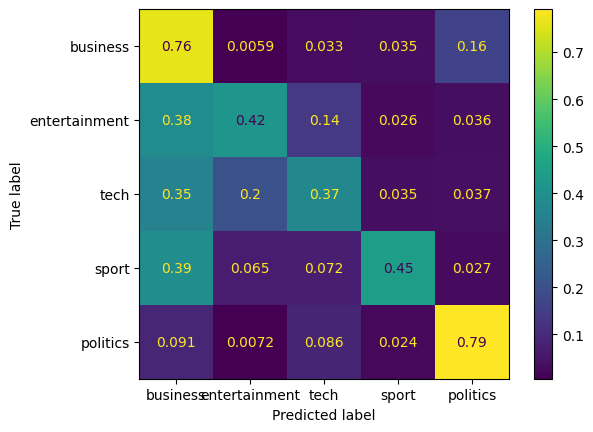

In [ ]:
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [ ]:
f1_score(df["labels"],predicted_labels,average='micro')

0.5649438202247191

In [ ]:
roc_auc_score(int_labels,probs,multi_class='ovo')

0.8853272009635841

# Complete the excercise

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.7 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

ner = pipeline('ner',aggregation_strategy='simple',device=0)

result = ner('Apple Inc. was founded by Steve Jobs and Steve Wozniak.')
print(result)

result = ner('The Eiffel Tower is located in Paris, France.')
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'entity_group': 'ORG', 'score': 0.9996176, 'word': 'Apple Inc', 'start': 0, 'end': 9}, {'entity_group': 'PER', 'score': 0.9946492, 'word': 'Steve Jobs', 'start': 26, 'end': 36}, {'entity_group': 'PER', 'score': 0.88902617, 'word': 'Steve Wozniak', 'start': 41, 'end': 54}]
[{'entity_group': 'MISC', 'score': 0.6937692, 'word': 'Eiffel Tower', 'start': 4, 'end': 16}, {'entity_group': 'LOC', 'score': 0.99946004, 'word': 'Paris', 'start': 31, 'end': 36}, {'entity_group': 'LOC', 'score': 0.9993007, 'word': 'France', 'start': 38, 'end': 44}]


In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification",
device=0)

result = classifier(
    "I am looking for a new smartphone.",
    candidate_labels=["technology", "sports", "politics"]
)

print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'I am looking for a new smartphone.', 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9867954254150391, 0.008458604104816914, 0.004745942540466785]}


In [ ]:
!pip install transformers sentencepiece transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [ ]:
from transformers import pipeline

translator=pipeline("translation",model='Helsinki-NLP/opus-mt-en-es',device=0) #model parameter is required here to specify the input and out language

result = translator("Hello, how are you?")
print(result)

result = translator("I love natural language processing.")
print(result)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'Hola, ¿cómo estás?'}]
[{'translation_text': 'Me encanta el procesamiento del lenguaje natural.'}]


In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")

context = "The Eiffel Tower is a wrought-iron lattice tower located in Paris, France."
question = "Where is the Eiffel Tower located?"

result = question_answerer(question=question, context=context)
print(result)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.846054196357727, 'start': 60, 'end': 73, 'answer': 'Paris, France'}


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")

text = "The rise of artificial intelligence has transformed various industries, including healthcare, finance, and transportation. AI technologies have improved medical diagnosis accuracy, automated financial trading processes, and revolutionized autonomous driving."

result = summarizer(text, max_length=15, min_length=10)
print(result)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Text summarization involves condensing a larger piece of text into a shorter, more concise version while preserving its key information . Transformers have shown remarkable capabilities in generating high-quality summaries . There are primary approaches to Text Summarization: extractive summarization and abstractive summarizing .'}]
